In [1]:
#Data Exploration

import pandas as pd
import numpy as np

#Reading the dataset

df = pd.read_csv("housing.csv")

#Previewing that data
df.shape
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#Checking and managing missing values. 

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [4]:
#Dropping the missing value from total_bedrooms
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
#Stats for the numerical features of the data
numerical_features = df.describe()
print(numerical_features)

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [6]:
# Frequency counts for categorical features
df["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

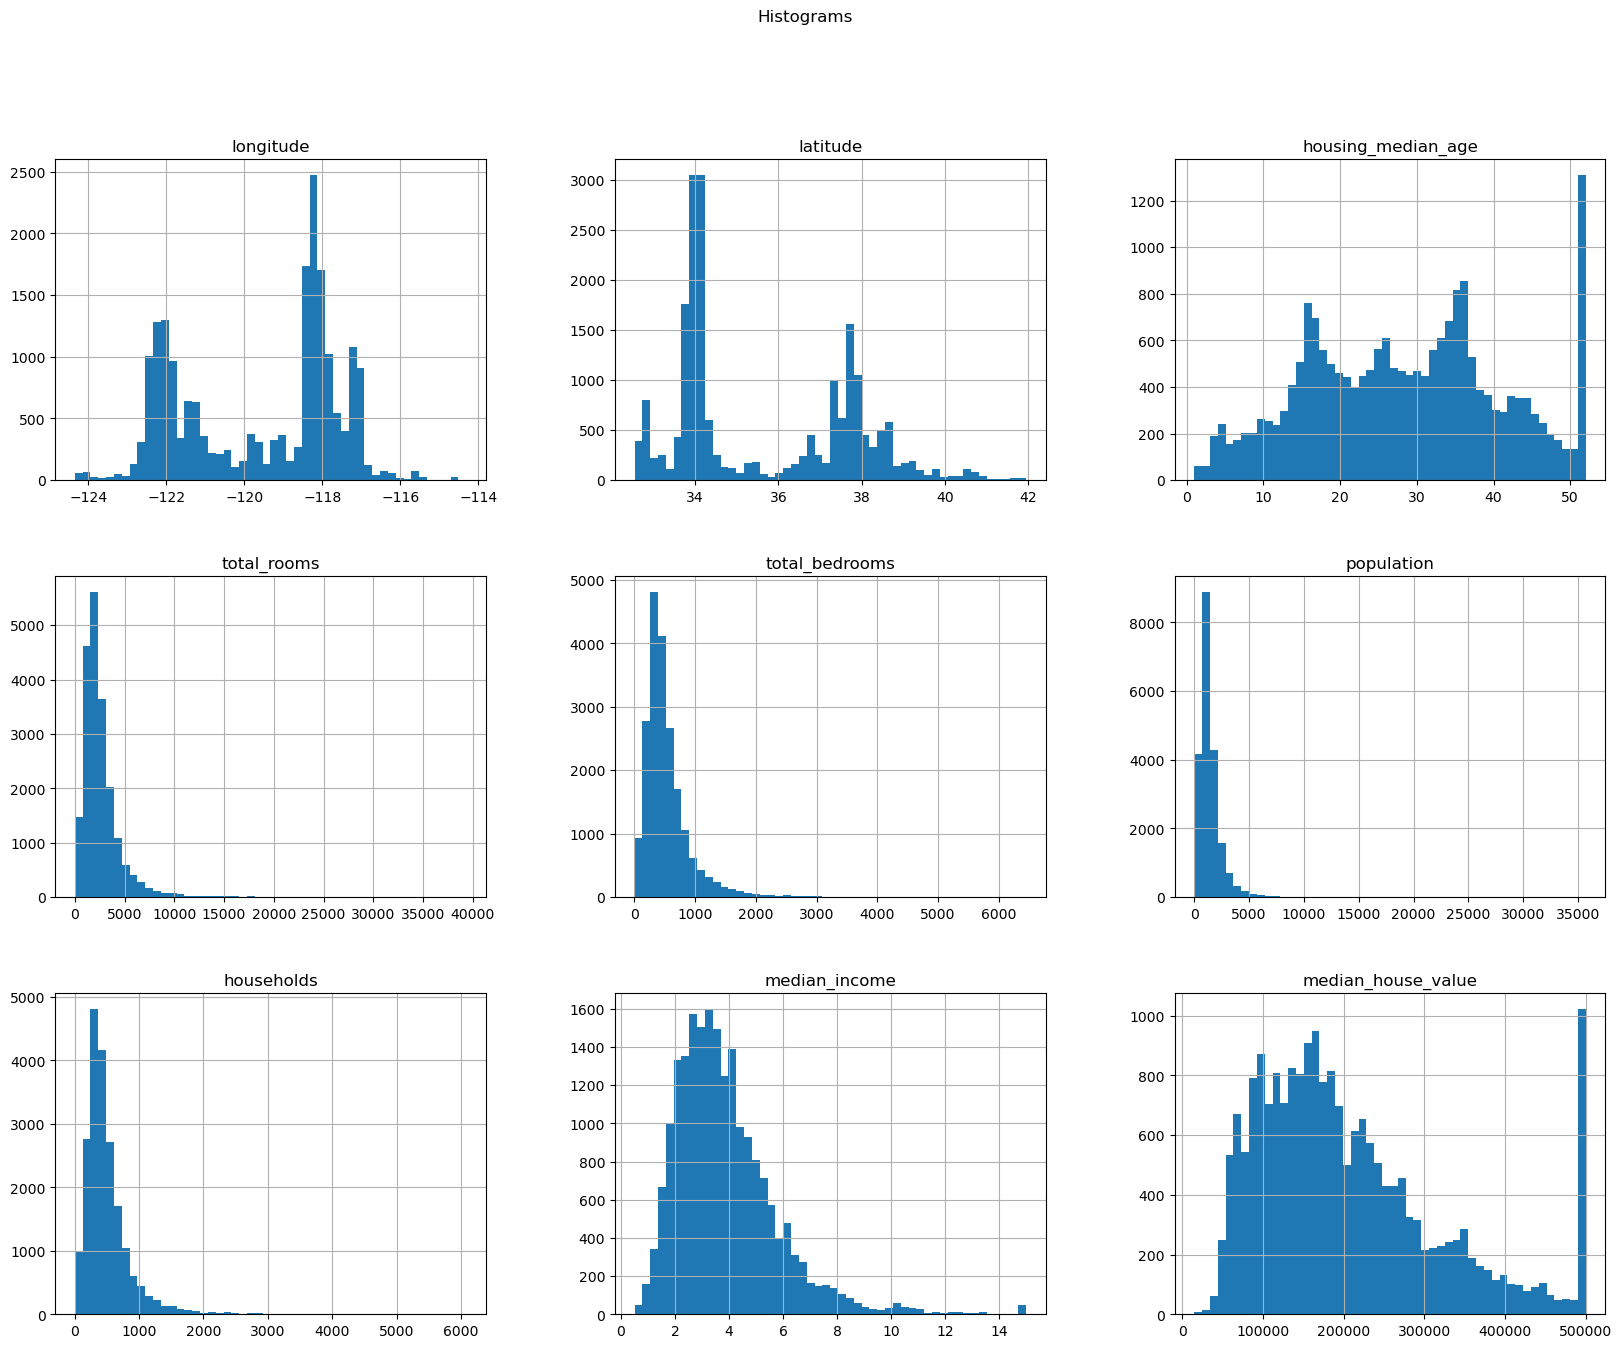

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histograms")
plt.show()

<Axes: >

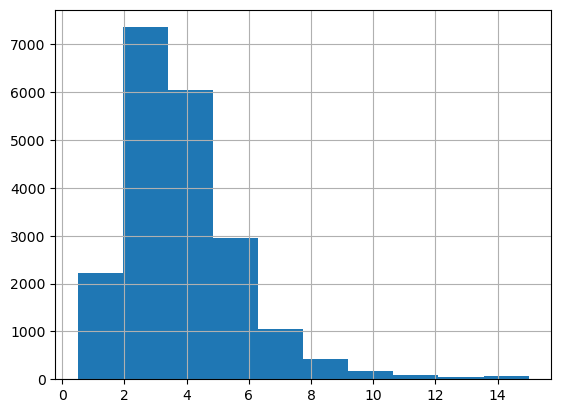

In [8]:
#median_income looks like an important feature
df["median_income"].hist()

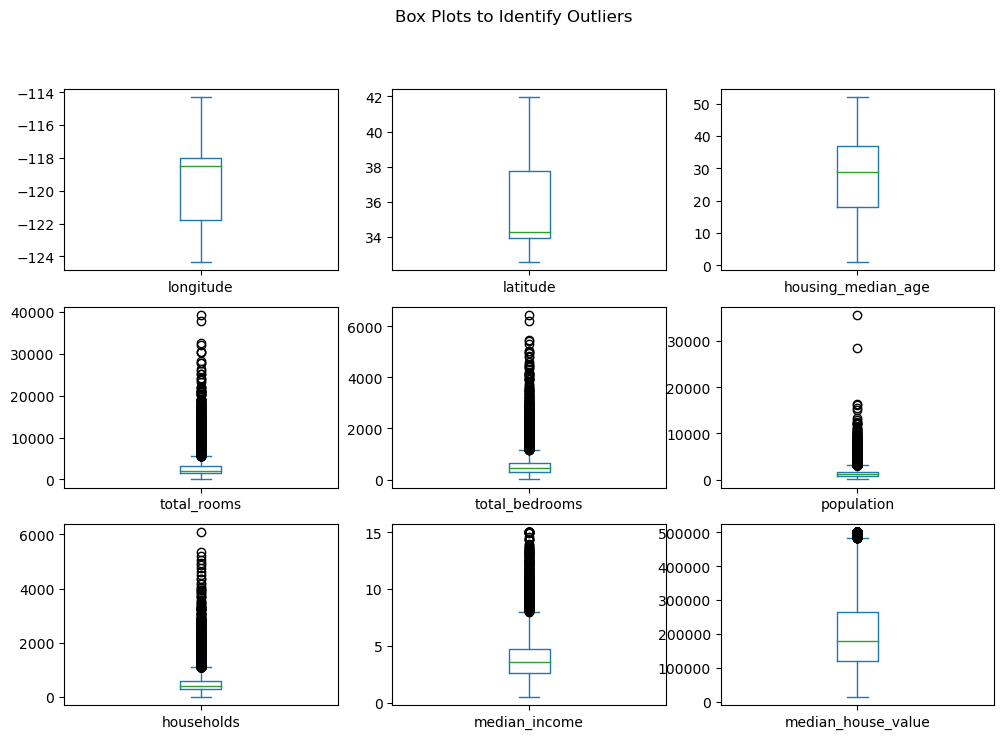

In [9]:
#Identifyig outliers using box plots

df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.suptitle("Box Plots to Identify Outliers")
plt.show()

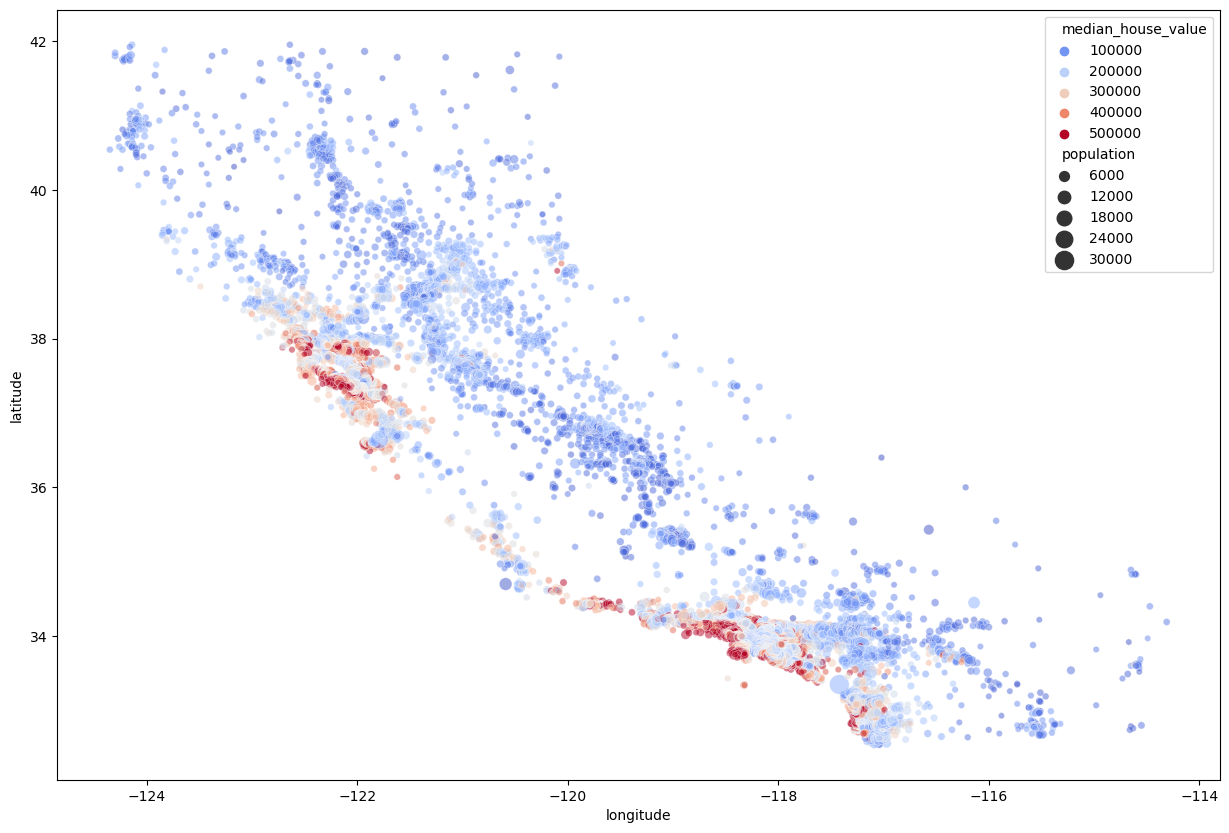

In [10]:
# Now using scatter plot to visualize relationship between the datasets.
import seaborn as sns

plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(x="longitude", 
                          y="latitude", 
                          data=df, 
                          hue="median_house_value", 
                          palette="coolwarm",
                          size="population",
                          sizes=(20, 200),
                          alpha=0.5)

In [11]:
#The corelationship matrix will help us understand the relationship of numercial data

# Correlation matrix
correlation_matrix = numerical_features.corr()

correlation_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
total_rooms           0.630308
population            0.581098
total_bedrooms       -0.142490
households           -0.157948
housing_median_age   -0.404968
latitude             -0.406143
median_income        -0.406310
longitude            -0.407802
Name: median_house_value, dtype: float64

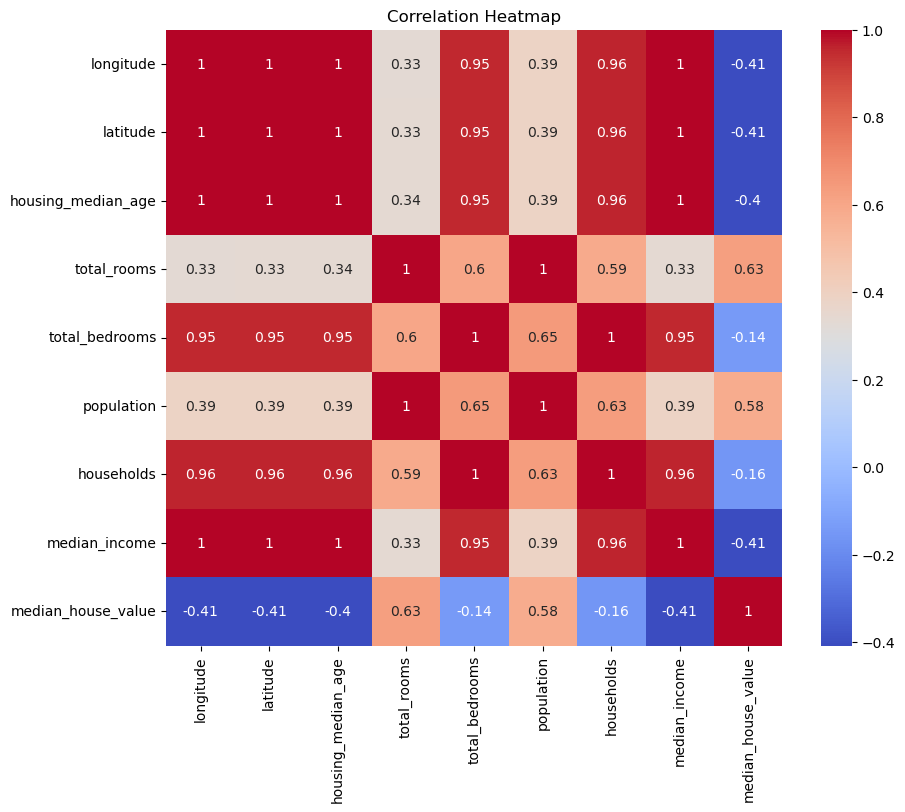

In [12]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
#One hot encoding



df['ocean_proximity'] = df['ocean_proximity'].astype('category')
ocean_prox_encoded = pd.get_dummies(df, columns=['ocean_proximity']).astype(float)
ocean_prox_encoded.columns = [f"int-{i}" for i in ocean_prox_encoded.columns]

ocean_prox_encoded.head()

,int-longitude,int-latitude,int-housing_median_age,int-total_rooms,int-total_bedrooms,int-population,int-households,int-median_income,int-median_house_value,int-ocean_proximity_<1H OCEAN,int-ocean_proximity_INLAND,int-ocean_proximity_ISLAND,int-ocean_proximity_NEAR BAY,int-ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [14]:
df.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [15]:
#Concatinating 
housing_final = pd.concat([ df.drop('ocean_proximity', axis=1), 
                          ocean_prox_encoded], axis=1)

housing_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,int-longitude,...,int-total_bedrooms,int-population,int-households,int-median_income,int-median_house_value,int-ocean_proximity_<1H OCEAN,int-ocean_proximity_INLAND,int-ocean_proximity_ISLAND,int-ocean_proximity_NEAR BAY,int-ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-122.23,...,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-122.22,...,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-122.24,...,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,-122.25,...,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,-122.25,...,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,-121.09,...,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,-121.21,...,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,-121.22,...,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,-121.32,...,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [16]:
#Regression Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = housing_final.drop(['median_house_value'], axis=1)
y = housing_final['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [17]:
#training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
model.score(X_test, y_test)

1.0

In [19]:
#coefficient
model.coef_

array([ 6.39495536e-12,  5.78337378e-12, -4.32927677e-13,  6.68068626e-15,
       -5.72808519e-14,  1.42803415e-14, -1.67375935e-14, -1.83173958e-11,
        6.39495550e-12,  5.78343892e-12, -4.32929900e-13,  6.68068626e-15,
       -5.72791172e-14,  1.42768721e-14, -1.67375935e-14, -1.83173958e-11,
        1.00000000e+00,  1.18250165e-12,  1.40526509e-12, -1.60465393e-12,
        6.27715353e-13, -1.61082816e-12])

In [20]:
#Predictions
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Model')

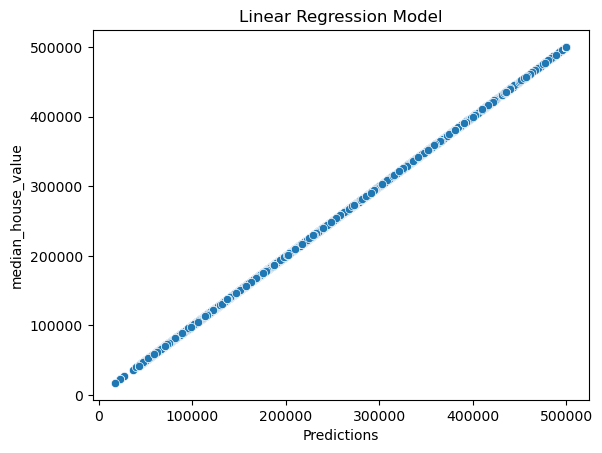

In [21]:
#scatter plot
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Linear Regression Model")

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [23]:
# #Checking Mean absolute error, mean squared error and RMSE
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  6.659183570769223e-11
Mean Squared Error:  7.53600195118509e-21
RMSE:  8.681014889507499e-11


In [24]:
# #Residuals
residuals = y_test - predictions

/Users/tenzing/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


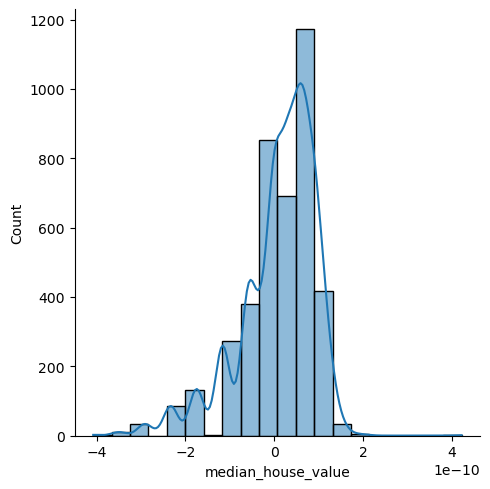

In [25]:
sns.displot(residuals, bins=20, kde=True)

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
degrees = [ 2, 3]  #Quadratic, Cubic
poly_results = []


for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)
    
    y_train_pred = poly_model.predict(X_train)
    y_test_pred = poly_model.predict(X_test)
    
    
    
    print("MSE: ",mean_squared_error(y_train, y_train_pred))
    print("MAE: ",mean_absolute_error(y_test, y_test_pred))

MSE:  1.8456164534067684e-17
MAE:  7.1075608901949435e-06
MSE:  20.625644967938335
MAE:  30.056117064732803


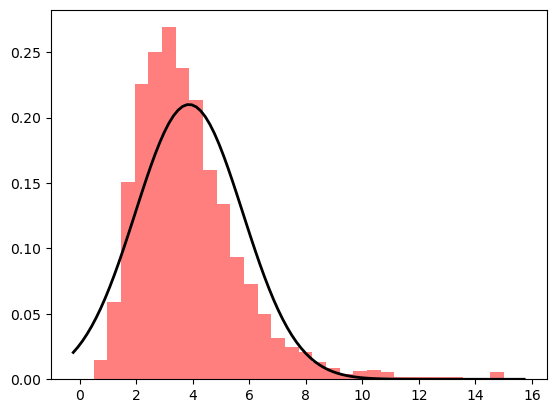

In [27]:
# Probability Theory Application 

from scipy.stats import norm

# Fitting the data
data = housing_final['median_income']
mu, std = norm.fit(data)

# Plotting the histogram and the fitted normal distribution
plt.hist(data, bins=30, density=True, alpha=0.5, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [28]:
# Performing the Kolmogorov-Smirnov test

from scipy.stats import kstest
ks_stat, p_value = kstest(data, 'norm', args=(mu, std))
print(f"K-S Statistic: {ks_stat}, P-Value: {p_value}")


K-S Statistic: 0.08927901040281205, P-Value: 3.641370484827294e-142


In [29]:
#Conditional Probability 
housing_category = housing_final
# Creating the categorical target variable by binning the 'median_house_value' into 3 quantiles
housing_category.loc[:, 'house_value_category'] = pd.qcut(housing_category['median_house_value'], q=3, labels=['Low', 'Medium', 'High'])

# Displaying the updated DataFrame with the new categorical target variable
housing_category[['median_house_value', 'house_value_category']].head()




,median_house_value,house_value_category
0,452600.0,High
1,358500.0,High
2,352100.0,High
3,341300.0,High
4,342200.0,High


In [30]:
# Converting the median income into bins
housing_category.loc[:, 'income_bin'] = pd.qcut(housing_category['median_income'], q=3)

# Calculating conditional probabilities
prob_table = pd.crosstab(housing_category['income_bin'], housing_category['house_value_category'], normalize='index')
print(prob_table)

house_value_category       Low    Medium      High
income_bin                                        
(0.499, 2.892]        0.651299  0.264572  0.084129
(2.892, 4.246]        0.300396  0.444575  0.255029
(4.246, 15.0]         0.048451  0.291000  0.660549


In [31]:
#Calculating expected values and varaiance

expected_value = housing_category['median_income'].mean()
variance = housing_category['median_income'].var()
print(f"Expected Value: {expected_value}, Variance: {variance}")

Expected Value: 3.8711616013311794, Variance: 3.607307249691303


In [32]:
#Performing logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Creating a categorical target variable
df['price_category'] = pd.qcut(df['median_house_value'], q=3, labels=['Low', 'Medium', 'High'])

# Prepare features and target
X = df[['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms']]
y = df['price_category']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Training logistic regression model
rm = LogisticRegression(random_state=42)
rm.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [35]:
prediction = rm.predict(X_test_scaled)

In [36]:
# Printing results
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 978   83  313]
 [  27 1027  312]
 [ 308  338  701]]


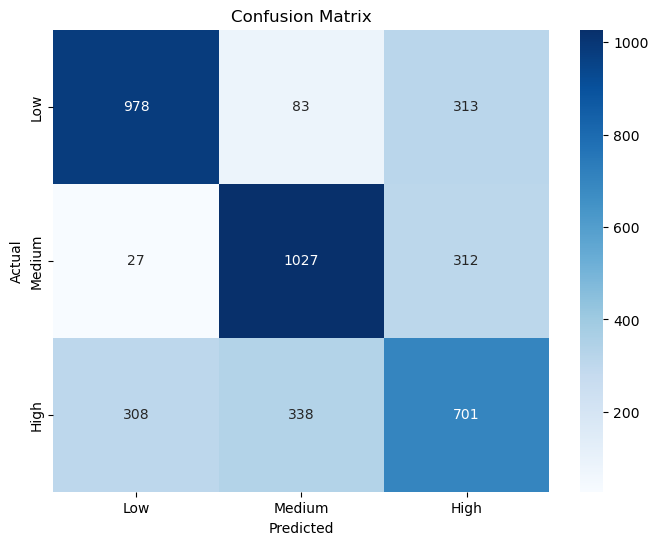

In [37]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print("Classification Report:")
print(classification_report(y_test, prediction))

Classification Report:
              precision    recall  f1-score   support

        High       0.74      0.71      0.73      1374
         Low       0.71      0.75      0.73      1366
      Medium       0.53      0.52      0.52      1347

    accuracy                           0.66      4087
   macro avg       0.66      0.66      0.66      4087
weighted avg       0.66      0.66      0.66      4087



In [39]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cv_scores = cross_val_score(rm, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"CV score standard deviation: {cv_scores.std():.4f}")

Cross-validation scores: [0.65382263 0.64698685 0.67207097 0.65249312 0.64270419]
Mean CV score: 0.6536
CV score standard deviation: 0.0100


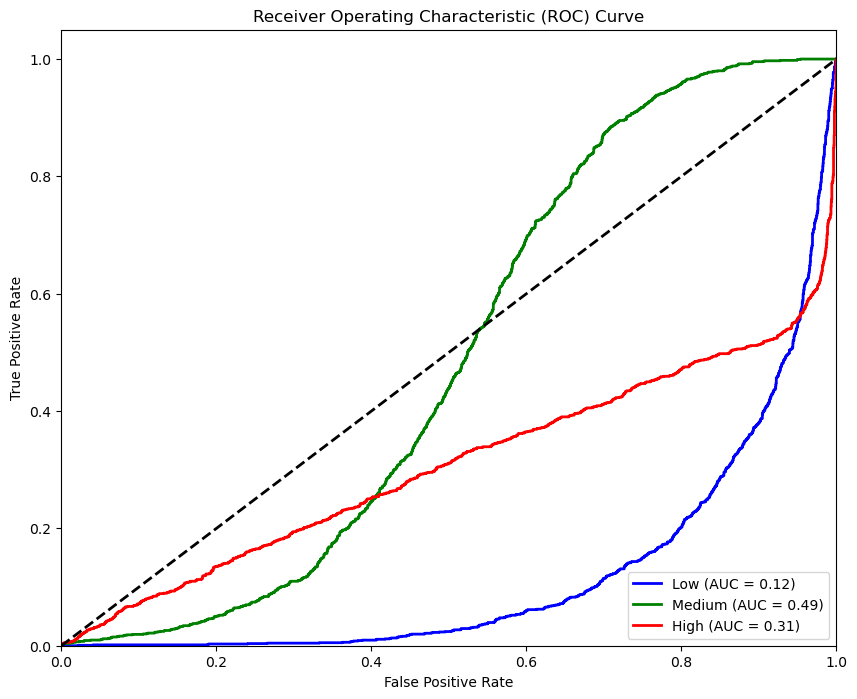

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=['Low', 'Medium', 'High'])
n_classes = y_test_bin.shape[1]

# Training a one-vs-rest classifier and getting decision function scores
ovr_classifier = OneVsRestClassifier(rm)
y_score = ovr_classifier.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
class_names = ['Low', 'Medium', 'High']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [41]:
#Regularization

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
lasso = Lasso()

In [42]:
#Hyperparameters for tuning
alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [43]:
#Converting Categorical values to numerical values.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [44]:
#Ridge Regression with Cross-Validation
ridge_cv = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [45]:
#Lasso Regression with Cross-Validation 
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [46]:
print("Best aplha value for Ridge", ridge_cv.best_params_)
print("Best alpha value for Lasso", lasso_cv.best_params_)

Best aplha value for Ridge {'alpha': 10}
Best alpha value for Lasso {'alpha': 0.01}


In [47]:
#Evaluating Ridge and Lasso model on test set

ridge_pred = ridge_cv.predict(X_test_scaled)
lasso_pred = lasso_cv.predict(X_test_scaled)

In [48]:
#Evaluating Performance
# Ridge performance
ridge_mse = mean_squared_error(y_test_encoded, ridge_pred)
ridge_r2 = r2_score(y_test_encoded, ridge_pred)
print(f"Ridge MSE: {ridge_mse}, R²: {ridge_r2}")

# Lasso performance
lasso_mse = mean_squared_error(y_test_encoded, lasso_pred)
lasso_r2 = r2_score(y_test_encoded, lasso_pred)
print(f"Lasso MSE: {lasso_mse}, R²: {lasso_r2}")


Ridge MSE: 0.5641550791809137, R²: 0.15257149400576742
Lasso MSE: 0.5650861400258491, R²: 0.1511729290899666


In [49]:
#Logistic Rgression with L2 Regularization

c_values = {'C': [0.01, 0.1, 1, 10, 100]}

#Performing Cross Validation to tune C values

rm_cv = GridSearchCV(rm, c_values, cv=5, scoring='accuracy')
rm_cv.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [50]:
print("Best C value for Logistic Regression: ", rm_cv.best_params_)

Best C value for Logistic Regression:  {'C': 100}


In [51]:
#Evaluating the model on test set
rm_pred = rm_cv.predict(X_test_scaled)

In [52]:
# Calculating Mean Squared Error (MSE)
rm_mse = mean_squared_error(y_test_encoded, rm_pred)
rm_rmse = rm_mse ** 0.5  # Root Mean Squared Error

# Calculating R² (R-squared)
rm_r2 = r2_score(y_test_encoded, rm_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rm_rmse}")
print(f"R² Score: {rm_r2}")

Root Mean Squared Error (RMSE): 0.8902319055212666
R² Score: -0.19044922490093952


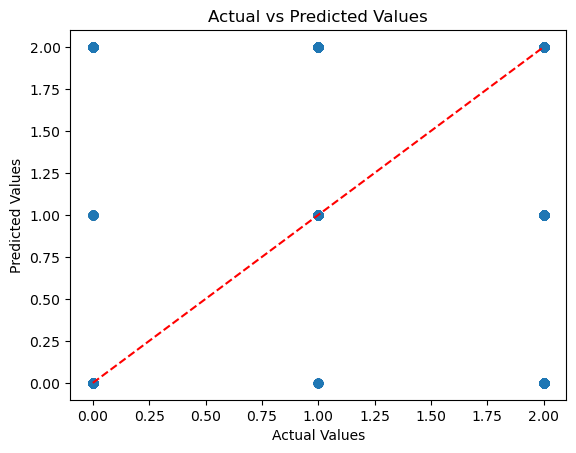

In [53]:
# Plot actual vs predicted
plt.scatter(y_test_encoded, rm_pred)
plt.plot([min(y_test_encoded), max(y_test_encoded)], [min(y_test_encoded), max(y_test_encoded)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()